In [1]:
import sys
from pathlib import Path
root_ref = Path("/Users/yk/Documents/Projects/Pre-PhD/resource")

if str(root_ref/"2023-journees-types") not in sys.path:
    sys.path.append(str(root_ref/"2023-journees-types"))

In [6]:
import pandas as pd
import calendar
import locale
from main import decoupage, attribution_poids, graphique

Dataset Lundi :
        Timestamp Timezone : Europe/Paris  Temperature  Humidity    CO2  Noise  \
0     1483311778     2017/01/02 00:02:58         20.5        49  875.0   52.0   
1     1483312081     2017/01/02 00:08:01         20.4        49  852.0   52.0   
2     1483312383     2017/01/02 00:13:03         20.3        50  841.0   52.0   
3     1483312686     2017/01/02 00:18:06         20.2        50  834.0   52.0   
4     1483312989     2017/01/02 00:23:09         20.1        50  819.0   52.0   
...          ...                     ...          ...       ...    ...    ...   
2652  1488235044     2017/02/27 23:37:24         15.9        64  556.0   36.0   
2653  1488235346     2017/02/27 23:42:26         15.9        64  550.0   36.0   
2654  1488235650     2017/02/27 23:47:30         15.8        64  546.0   36.0   
2655  1488235952     2017/02/27 23:52:32         15.8        64  550.0   36.0   
2656  1488236254     2017/02/27 23:57:34         15.8        64  551.0   36.0   

      Pres

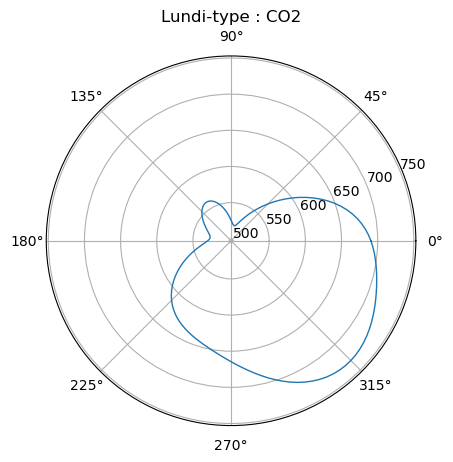

In [8]:
locale.setlocale(locale.LC_ALL, 'fr_FR.UTF-8')

# etape 0 : initialisation des parametres et lecture du fichier
fichier = root_ref / "2023-journees-types" / "data" / "Salon_01_02_2017.csv"
# fichier = "data/Salon_01_02_2017.csv"  # Salon_01_02_2017.csv  RL2018_Fevrier_Timestamp.csv  bureau_16_1_2019.csv
separateur = ";"                       # Douche_01_02_2017.csv  Outside_01_02_2017.csv
ligneHeader = 3

kappa = 10
numeroJour = 0
reechantillonage = 10
typeDonnees = "CO2"

typeProjection = "polaire"

donnees = pd.read_csv(fichier, sep=separateur, header=ligneHeader, engine="python")

# etape 1 : decoupage des points initiaux en troncons
troncons = decoupage(donnees)  # troncons contient 7 dataframes : de lundi a dimanche
troncon = troncons[numeroJour]
print(f"Dataset {calendar.day_name[numeroJour]} :\n", troncon)

# etape 2 : application de la fonction de repartition des poids et calcul des moyennes ponderees glissantes
listeTemps = troncon.loc[:, "Timestamp"].to_list()
listeDonnees = troncon.loc[:, typeDonnees].to_list()
resultatsLisses = attribution_poids(listeTemps, listeDonnees, kappa, reechantillonage)
# resultatsLisses = moyenneSimple(listeTemps, listeDonnees)
tempsLisses = resultatsLisses[0]
donneesLissees = resultatsLisses[1]
print(f"\nTemps : Données lissées pour {typeDonnees}")
for ind in range(len(tempsLisses)):
    print(f"{tempsLisses[ind]} : {donneesLissees[ind]}")

# etape 3 : affichage sous la forme d'un graphique
graphique(typeProjection, tempsLisses, donneesLissees, numeroJour, typeDonnees)

In [ ]:
model = tramsformer.from_pretrained("mBert-betav01")